In [4]:
import math
import numpy as np
from scipy.integrate import quad

In [3]:
def M76_generate_paths(S0, T, r, sigma, lamb, mu, delta, M, I): 
    dt = T / M 
    rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) 
    shape = (M + 1, I) 
    S = np.zeros((M + 1, I), dtype=np.float) 
    S[0] = S0 
    np.random.seed(10000) 
    rand1 = np.random.standard_normal(shape) 
    rand2 = np.random.standard_normal(shape) 
    rand3 = np.random.poisson(lamb * dt, shape) #returns 0000100000..
    for t in range(1, M + 1, 1): 
        S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt 
                           + sigma * math.sqrt(dt) * rand1[t]) 
                           + (np.exp(mu + delta * rand2[t]) - 1) 
                           * rand3[t]) 
    return S

In [10]:
S0 = 100.0 # initial index level 
K = 100.0 # strike level 
T = 1.0 # call option maturity 
r = 0.05 # constant short rate 
sigma = 0.4 # constant volatility of diffusion 
lamb = 1.0 # jump frequency p.a. 
mu = -0.2 # expected jump size 
delta = 0.1 # jump size volatility

In [11]:
M = 100 # time steps 
I = 10 # paths 
S = M76_generate_paths(S0, T, r, sigma, lamb, mu, delta, M, I)

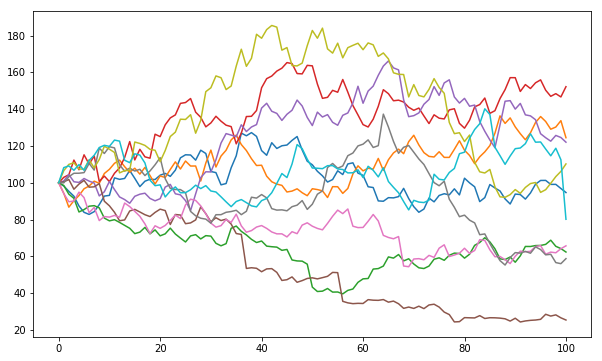

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(S)

In [14]:
def M76_value_call_MCS(K): 
    return math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

In [16]:
%%time 
I = 200000 
S = M76_generate_paths(S0, T, r, sigma, lamb, mu, delta, M, I) 
print("Value of Call Option %8.3f" % M76_value_call_MCS(K))

Value of Call Option   19.941
Wall time: 2.74 s
